In [2]:
import numpy as np
import pandas as pd

In [3]:
diamonds = pd.read_csv("diamonds.csv")

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C23CE5AFA0>,
      dtype=object)

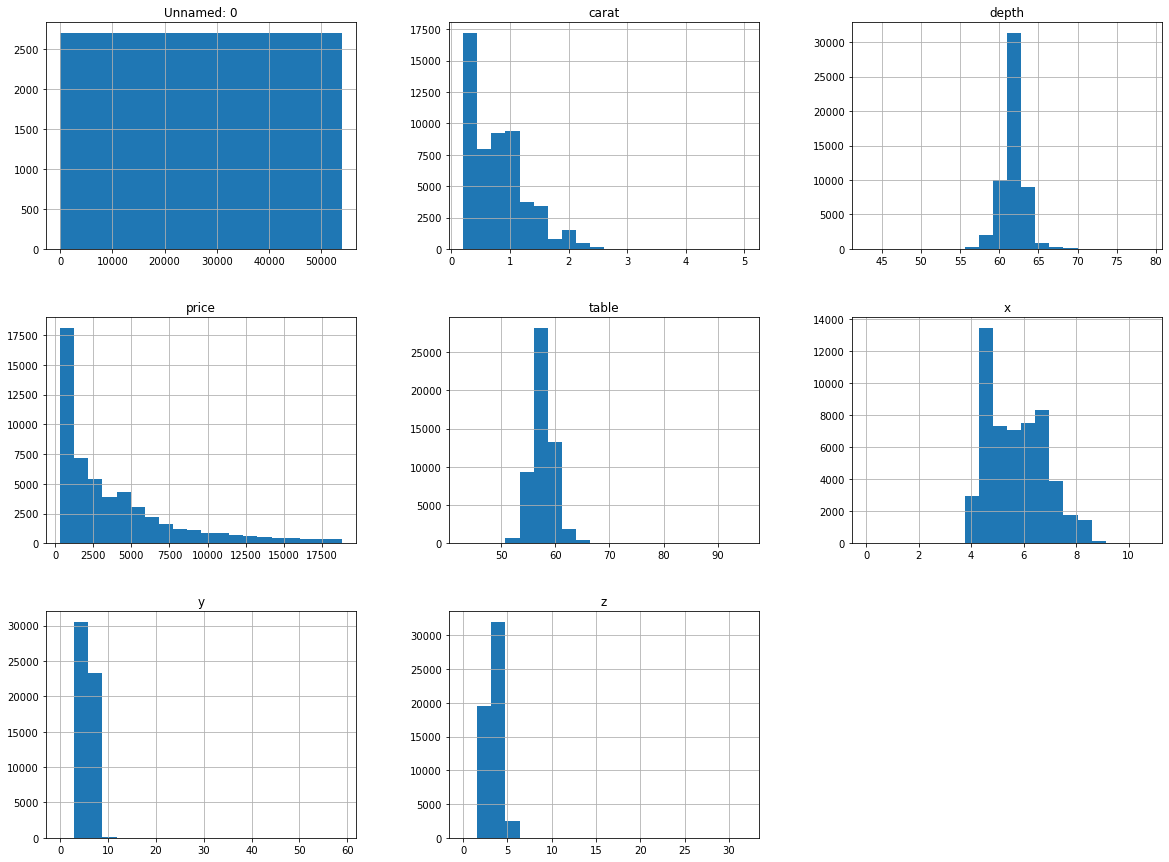

In [6]:
import matplotlib as plt
import seaborn as sns
diamonds.hist(figsize=(20,15),bins=20)

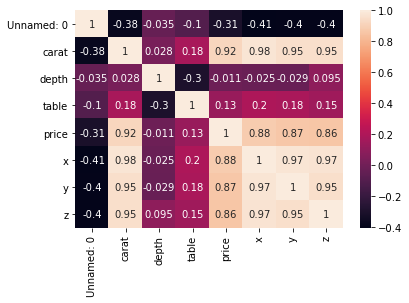

In [7]:
sns.heatmap(data=diamonds.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C23DFA3340>,
      dtype=object)

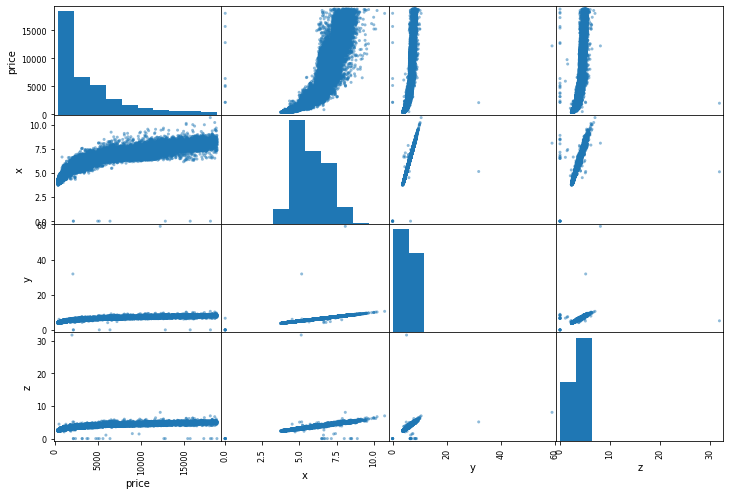

In [8]:
from pandas.plotting import scatter_matrix

att1=["price","x","y","z"]
scatter_matrix(diamonds[att1],figsize=(12, 8))

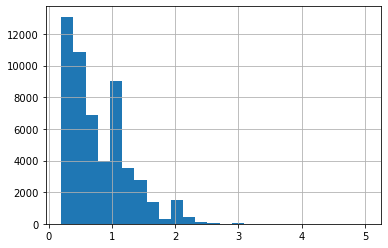

In [9]:
diamonds["carat"].hist(bins=25)


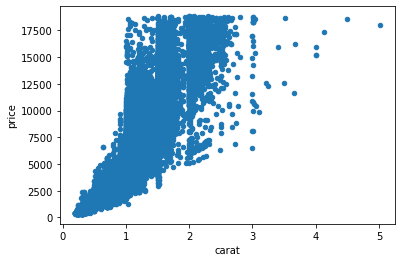

In [10]:
diamonds.plot(kind="scatter",x="carat",y="price")

In [11]:
def categorize(shimatta):
    shesmo1 = {'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1}
    shesmo2 = {'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
    shesmo3 = {'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1}
    shimatta.loc[:,'cut']=diamonds.loc[:,'cut'].map(shesmo1)
    shimatta.loc[:,'clarity']=diamonds.loc[:,'clarity'].map(shesmo3)
    shimatta.loc[:,'color']=diamonds.loc[:,'color'].map(shesmo2)
    return shimatta

def cleaning(data): 
    
    
    data=data.drop(data[data["z"]==0].index)
    data=data.drop(data[data["y"]==0].index)
    data=data.drop(data[data["x"]==0].index)
    
   
    
    if "Unnamed: 0" in data:
        data=data.drop(["Unnamed: 0"],axis=1)

    
    data = data[(data["depth"]<75)&(data["depth"]>45)]
    data = data[(data["table"]<80)&(data["table"]>40)]
    data = data[(data["x"]<30)]
    data = data[(data["y"]<30)]
    data = data[(data["z"]<30)&(data["z"]>2)]
    
    data["size"]=data["x"]*data["y"]*data["z"]*1/3
    data = data[(data["size"]<120)]
    dataf=data.drop(["x","y","z"],axis=1)

    
    if "carat" in diamonds:
        carat_log= np.log10(diamonds["carat"])
        dataf["carat_log"]=carat_log
        dataf.drop("carat",inplace=True,axis=1)
       
    return dataf

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer



num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
    ])





In [13]:
def prepare_data(data):
    data=cleaning(data)
    data=categorize(data)
    data_num=num_pipeline.fit_transform(data)
    return data
diamonds_prep=prepare_data(diamonds)
diamonds_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53452 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cut        53452 non-null  int64  
 1   color      53452 non-null  int64  
 2   clarity    53452 non-null  int64  
 3   depth      53452 non-null  float64
 4   table      53452 non-null  float64
 5   price      53452 non-null  int64  
 6   size       53452 non-null  float64
 7   carat_log  53452 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 3.7 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C23DC83430>,
      dtype=object)

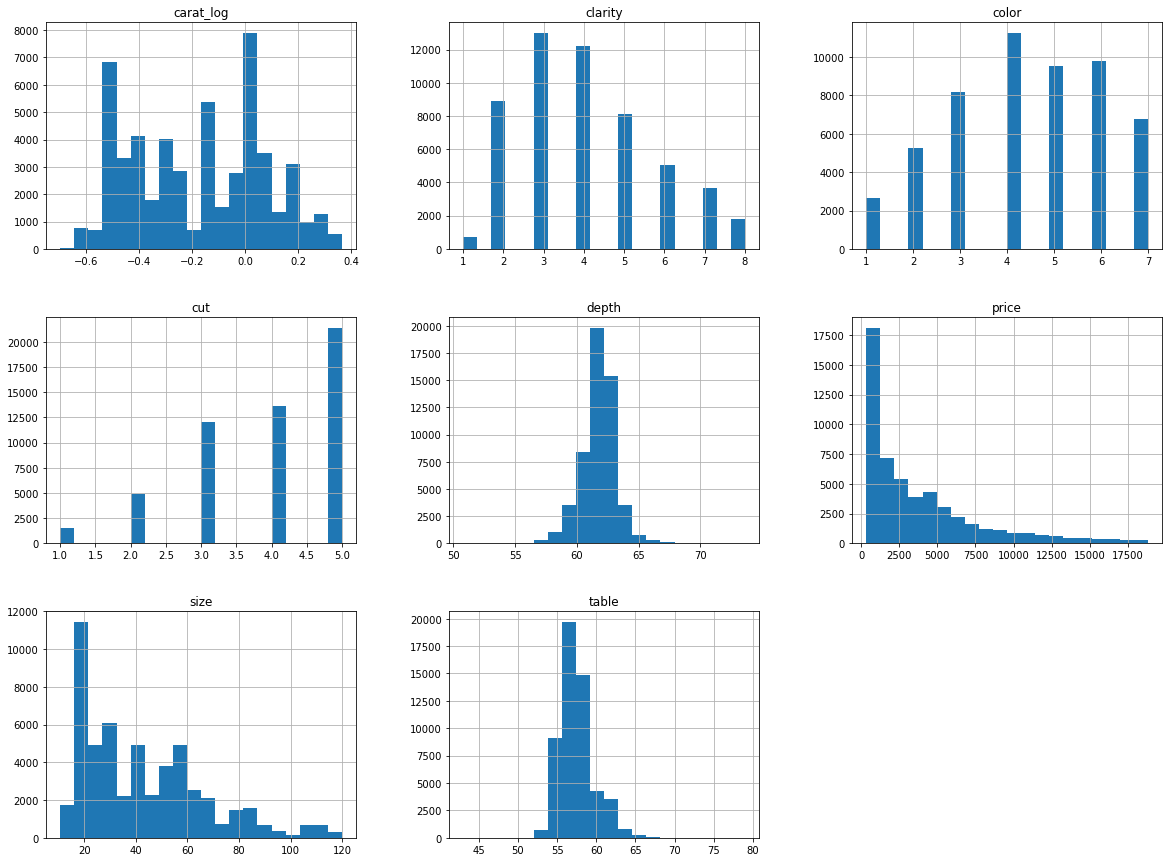

In [14]:
diamonds_prep.hist(figsize=(20,15),bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C240CBF910>,
      dtype=object)

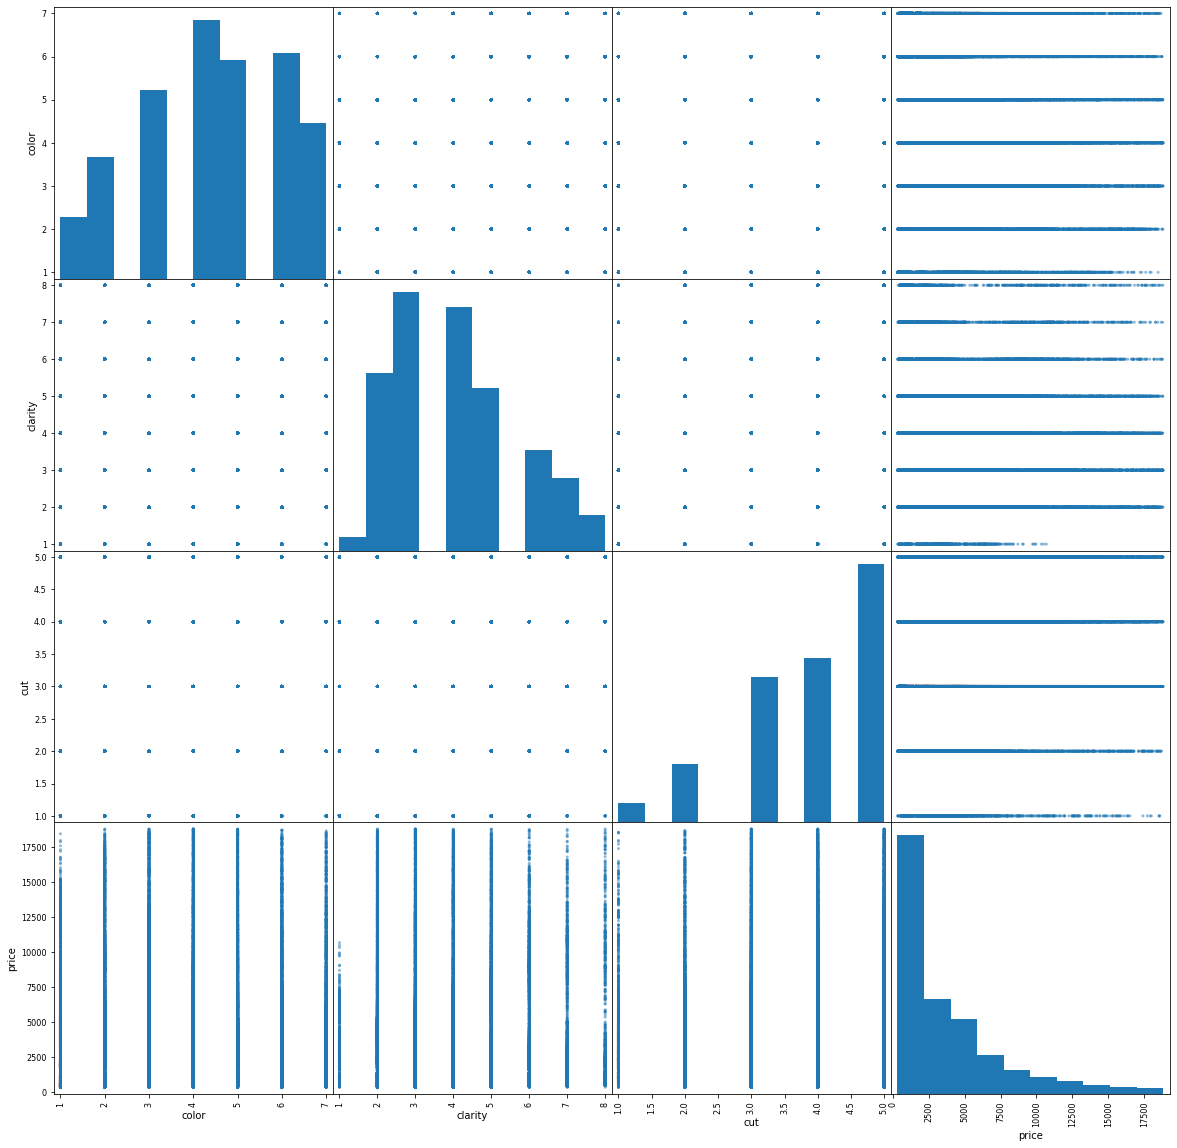

In [25]:
cat_attr=diamonds_prep[["color","clarity","cut","price"]]
scatter_matrix(cat_attr,figsize=(20,20),alpha =0.5)

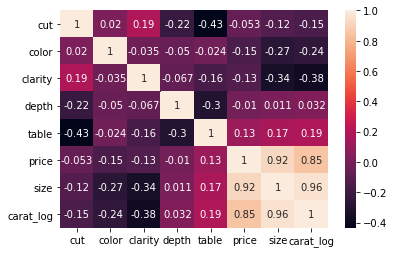

In [38]:
sns.heatmap(data=diamonds_prep.corr(),annot=True)

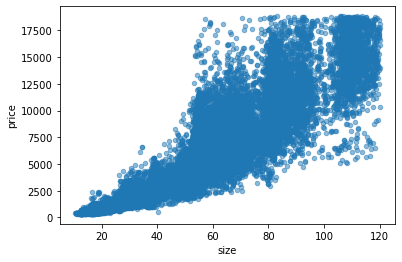

In [43]:
diamonds_prep.plot(kind="scatter",x="size",y="price")

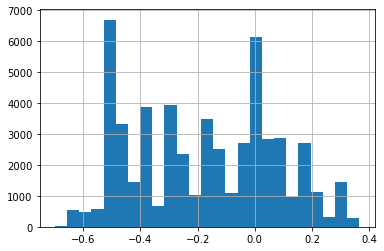

In [35]:
diamonds_prep["carat_log"].hist(bins=25)

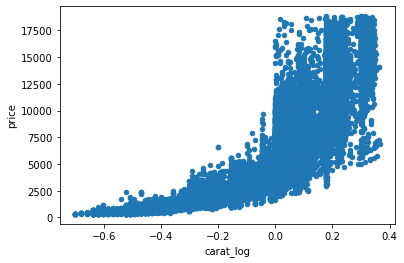

In [21]:
diamonds_prep.plot(kind="scatter",x="carat_log",y="price")

In [15]:
from sklearn.model_selection import train_test_split



diamonds_prep=prepare_data(diamonds)

train_set, test_set = train_test_split(diamonds_prep, test_size=0.2, random_state=42)


diamonds_train=train_set.drop("price",axis=1)
diamonds_price=train_set["price"].copy()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024284D59460>,
      dtype=object)

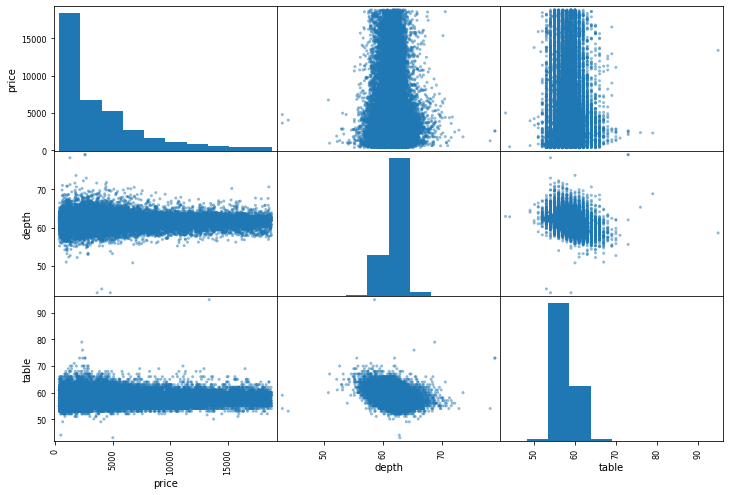

In [45]:
from pandas.plotting import scatter_matrix

att1=["price","depth","table"]
scatter_matrix(diamonds[att1],figsize=(12, 8))

In [21]:


from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(diamonds_train, diamonds_price)



LinearRegression()

In [22]:
from sklearn.metrics import mean_squared_error

diamonds_prediction = lin_reg.predict(diamonds_train)
lin_rmse=mean_squared_error(diamonds_price,diamonds_prediction)
lin_rmse=np.sqrt(lin_rmse)
lin_rmse

1125.5026940087953

In [23]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg=DecisionTreeRegressor()
tree_reg.fit(diamonds_train,diamonds_price)

diamonds_prediction = tree_reg.predict(diamonds_train)
tree_rmse=mean_squared_error(diamonds_price,diamonds_prediction)
tree_rmse=np.sqrt(tree_rmse)
tree_rmse

33.31998723335585

In [24]:
from sklearn.ensemble import RandomForestRegressor
fors_reg=RandomForestRegressor()
fors_reg.fit(diamonds_train,diamonds_price)

diamonds_prediction = fors_reg.predict(diamonds_train)
fors_rmse=mean_squared_error(diamonds_price,diamonds_prediction)
fors_rmse=np.sqrt(fors_rmse)
fors_rmse

195.29881970209485

In [25]:
from sklearn.model_selection import cross_val_score
def display_scores(scores):    
    print("scores mean :",scores.mean())
    print("scores std :",scores.std())
    print(scores)


In [26]:
lin_scores=cross_val_score(lin_reg,diamonds_train,diamonds_price,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

scores mean : 1125.1571786546083
scores std : 40.805982674335006
[1058.82693044 1099.73806945 1124.32658922 1156.2412335  1117.41321917
 1099.77949656 1217.61868351 1096.68255246 1133.20984305 1147.73516918]


In [27]:
tree_scores =cross_val_score(tree_reg,diamonds_train,diamonds_price,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores =np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

scores mean : 699.4120630432129
scores std : 25.31823423071485
[664.56141639 682.48209379 695.57624042 685.90734797 732.88387351
 698.33355742 755.48989501 691.48322507 681.10166324 706.30131762]


In [28]:
fors_reg_scores=cross_val_score(fors_reg,diamonds_train,diamonds_price,scoring="neg_mean_squared_error", cv=10)
fors_reg_rmse_scores=np.sqrt(-fors_reg_scores)
display_scores(fors_reg_rmse_scores)

scores mean : 526.7060986491744
scores std : 30.361626872737485
[513.74425334 506.20161417 527.19928259 510.87670348 536.71072595
 512.6077767  611.57221475 520.37314277 497.93172255 529.84355018]


In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(diamonds_train, diamonds_price)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\Anaconda\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\Anaconda\lib\site-packages\joblib\_parallel_backends.py", line 208

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
        print(np.sqrt(-mean_score), params)

684.9777211922817 {'max_features': 2, 'n_estimators': 3}
578.793786831188 {'max_features': 2, 'n_estimators': 10}
549.5926026782146 {'max_features': 2, 'n_estimators': 30}
616.2416366489762 {'max_features': 4, 'n_estimators': 3}
545.2273878559719 {'max_features': 4, 'n_estimators': 10}
527.9462175514293 {'max_features': 4, 'n_estimators': 30}
608.3899896736032 {'max_features': 6, 'n_estimators': 3}
547.6144457869653 {'max_features': 6, 'n_estimators': 10}
534.8121399369588 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
644.8551405506141 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
575.2894775675803 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
611.7022256173387 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
553.8974752586382 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
614.2071856112053 {'bootstrap': False, 'm

In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00324879, 0.03568961, 0.06504022, 0.0064827 , 0.00479973,
       0.56186191, 0.32287703])

In [32]:
attributes=diamonds_train.columns
sorted(zip(feature_importances, attributes), reverse=True)


[(0.5618619127983041, 'size'),
 (0.32287703023589054, 'carat_log'),
 (0.0650402227287103, 'clarity'),
 (0.0356896104795018, 'color'),
 (0.006482700220864364, 'depth'),
 (0.004799729106419719, 'table'),
 (0.003248794430309111, 'cut')]

In [33]:
final_model = grid_search.best_estimator_
X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()


In [34]:
final_predictions = final_model.predict(X_test)


In [35]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

500.0942867201543

In [36]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([478.81135165, 520.50771441])

In [37]:
'''import joblib


liner_model = 'noNorm_linear.sav'
joblib.dump(lin_reg, liner_model)

dis_tree = 'noNorm_tree.sav'
joblib.dump(tree_reg, dis_tree)

fors_reg = 'noNorm_forest.sav'
joblib.dump(fors_reg, fors_reg)
'''

"import joblib\n\n\nliner_model = 'noNorm_linear.sav'\njoblib.dump(lin_reg, liner_model)\n\ndis_tree = 'noNorm_tree.sav'\njoblib.dump(tree_reg, dis_tree)\n\nfors_reg = 'noNorm_forest.sav'\njoblib.dump(fors_reg, fors_reg)\n"